In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고 
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다. 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다. 
따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

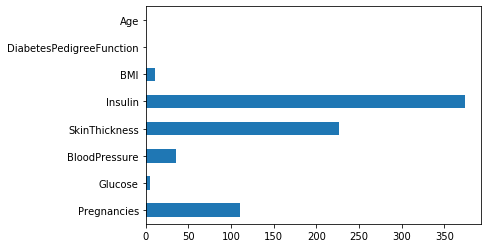

In [8]:
df[feature_columns].replace(0, np.nan).isnull().sum().plot.barh()

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

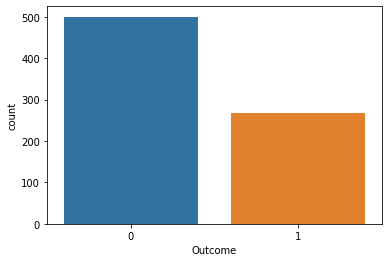

In [10]:
sns.countplot(data=df, x="Outcome")

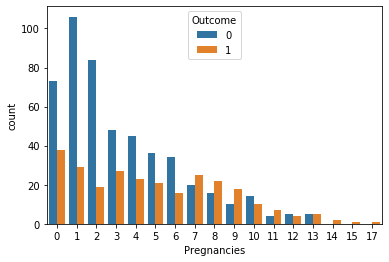

In [11]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

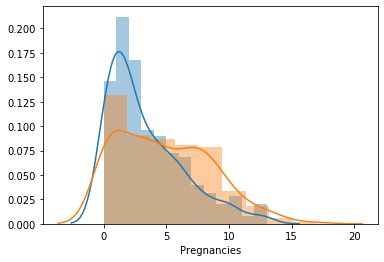

In [12]:
sns.distplot(df.loc[df["Outcome"]==0, "Pregnancies"])
sns.distplot(df.loc[df["Outcome"]==1, "Pregnancies"])

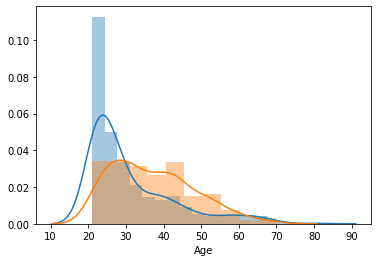

In [13]:
sns.distplot(df.loc[df["Outcome"]==0, "Age"])
sns.distplot(df.loc[df["Outcome"]==1, "Age"])

In [14]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.
df.columns.shape

(9,)

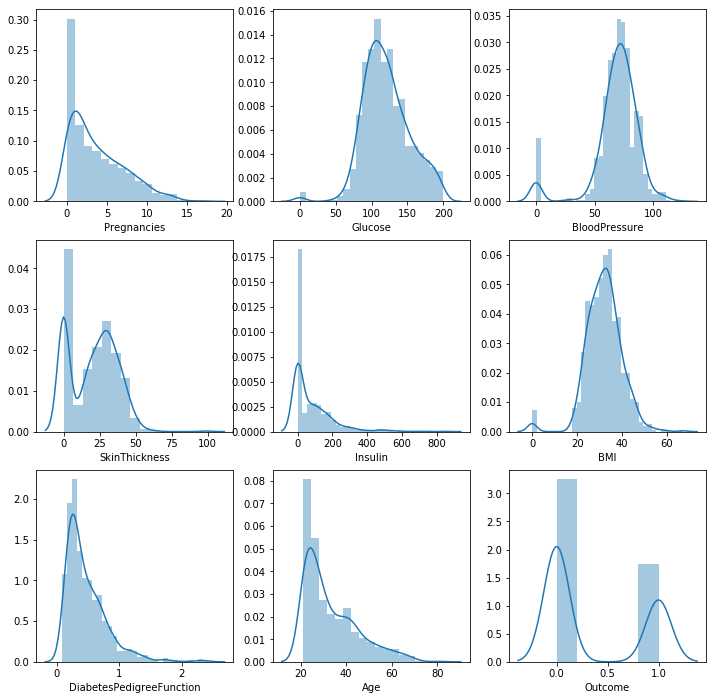

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12, 12)

for i, column in enumerate(df.columns):
    row = round( (i - 1) / 3)
    col = i % 3
    sns.distplot(df[column], ax=axes[row][col])

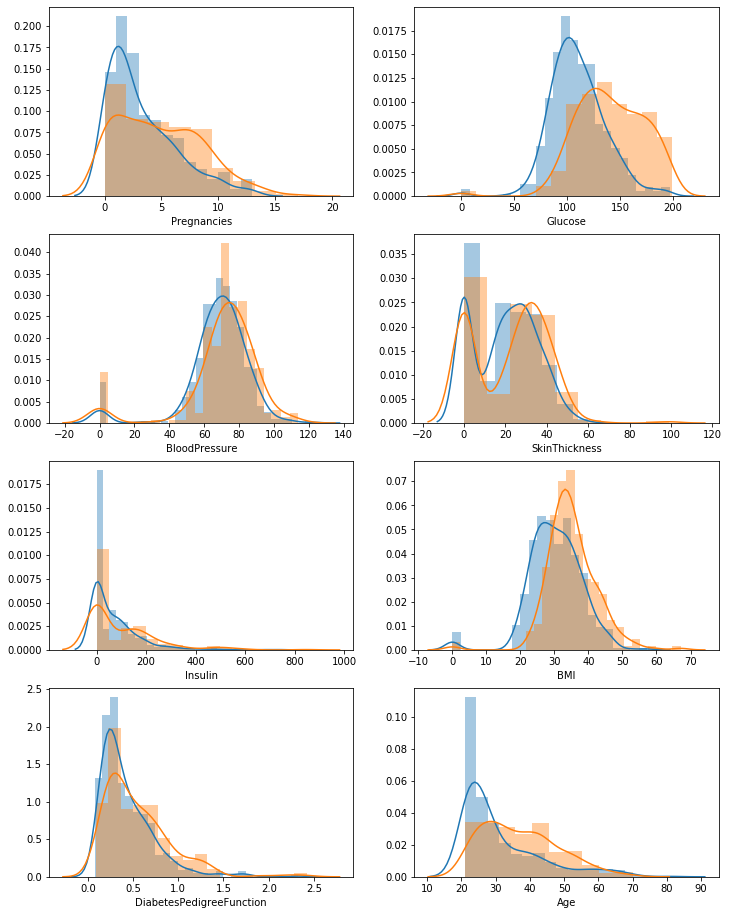

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 16)

for i in range(len(feature_columns)):
    column = df.columns[i]
    row = int( i / 2)
    col = i % 2
    sns.distplot(df.loc[df["Outcome"] == 0, column], ax=axes[row][col])
    sns.distplot(df.loc[df["Outcome"] == 1, column], ax=axes[row][col])

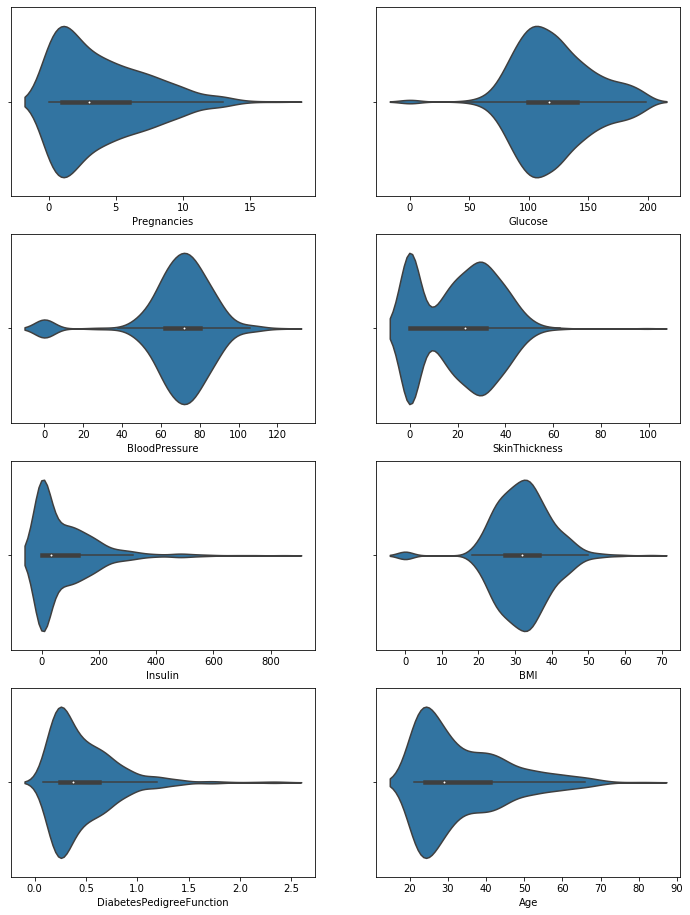

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 16)

for i in range(len(feature_columns)):
    column = df.columns[i]
    row = int( i / 2)
    col = i % 2
    sns.violinplot(data = df, x=column, ax=axes[row][col])

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


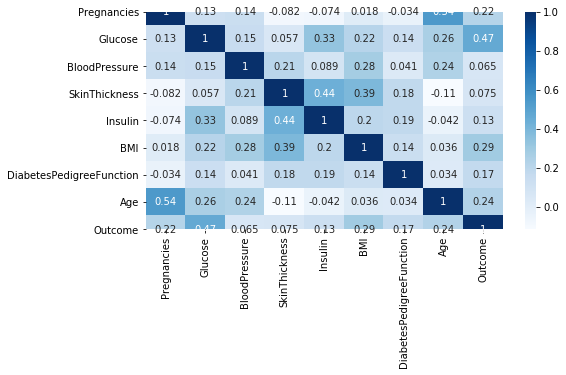

In [19]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt=".2g", cmap='Blues')

In [20]:
# 히트맵을 그려보면 Outcome 과 Glucose 가 상관계수가 가장 높다. 
# 또, Glucose 는 Insulin 과 상관계수가 높다.

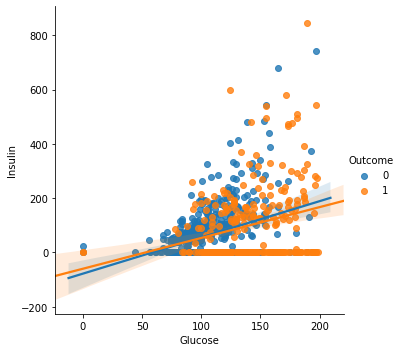

In [21]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

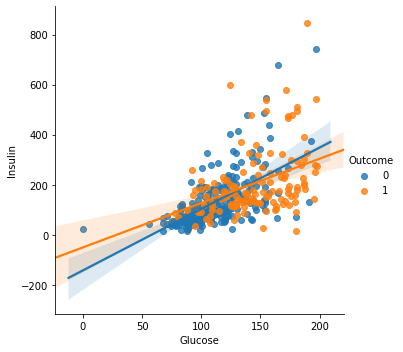

In [22]:
sns.lmplot(data=df[df["Insulin"] > 0], 
           x="Glucose", y="Insulin", hue="Outcome")

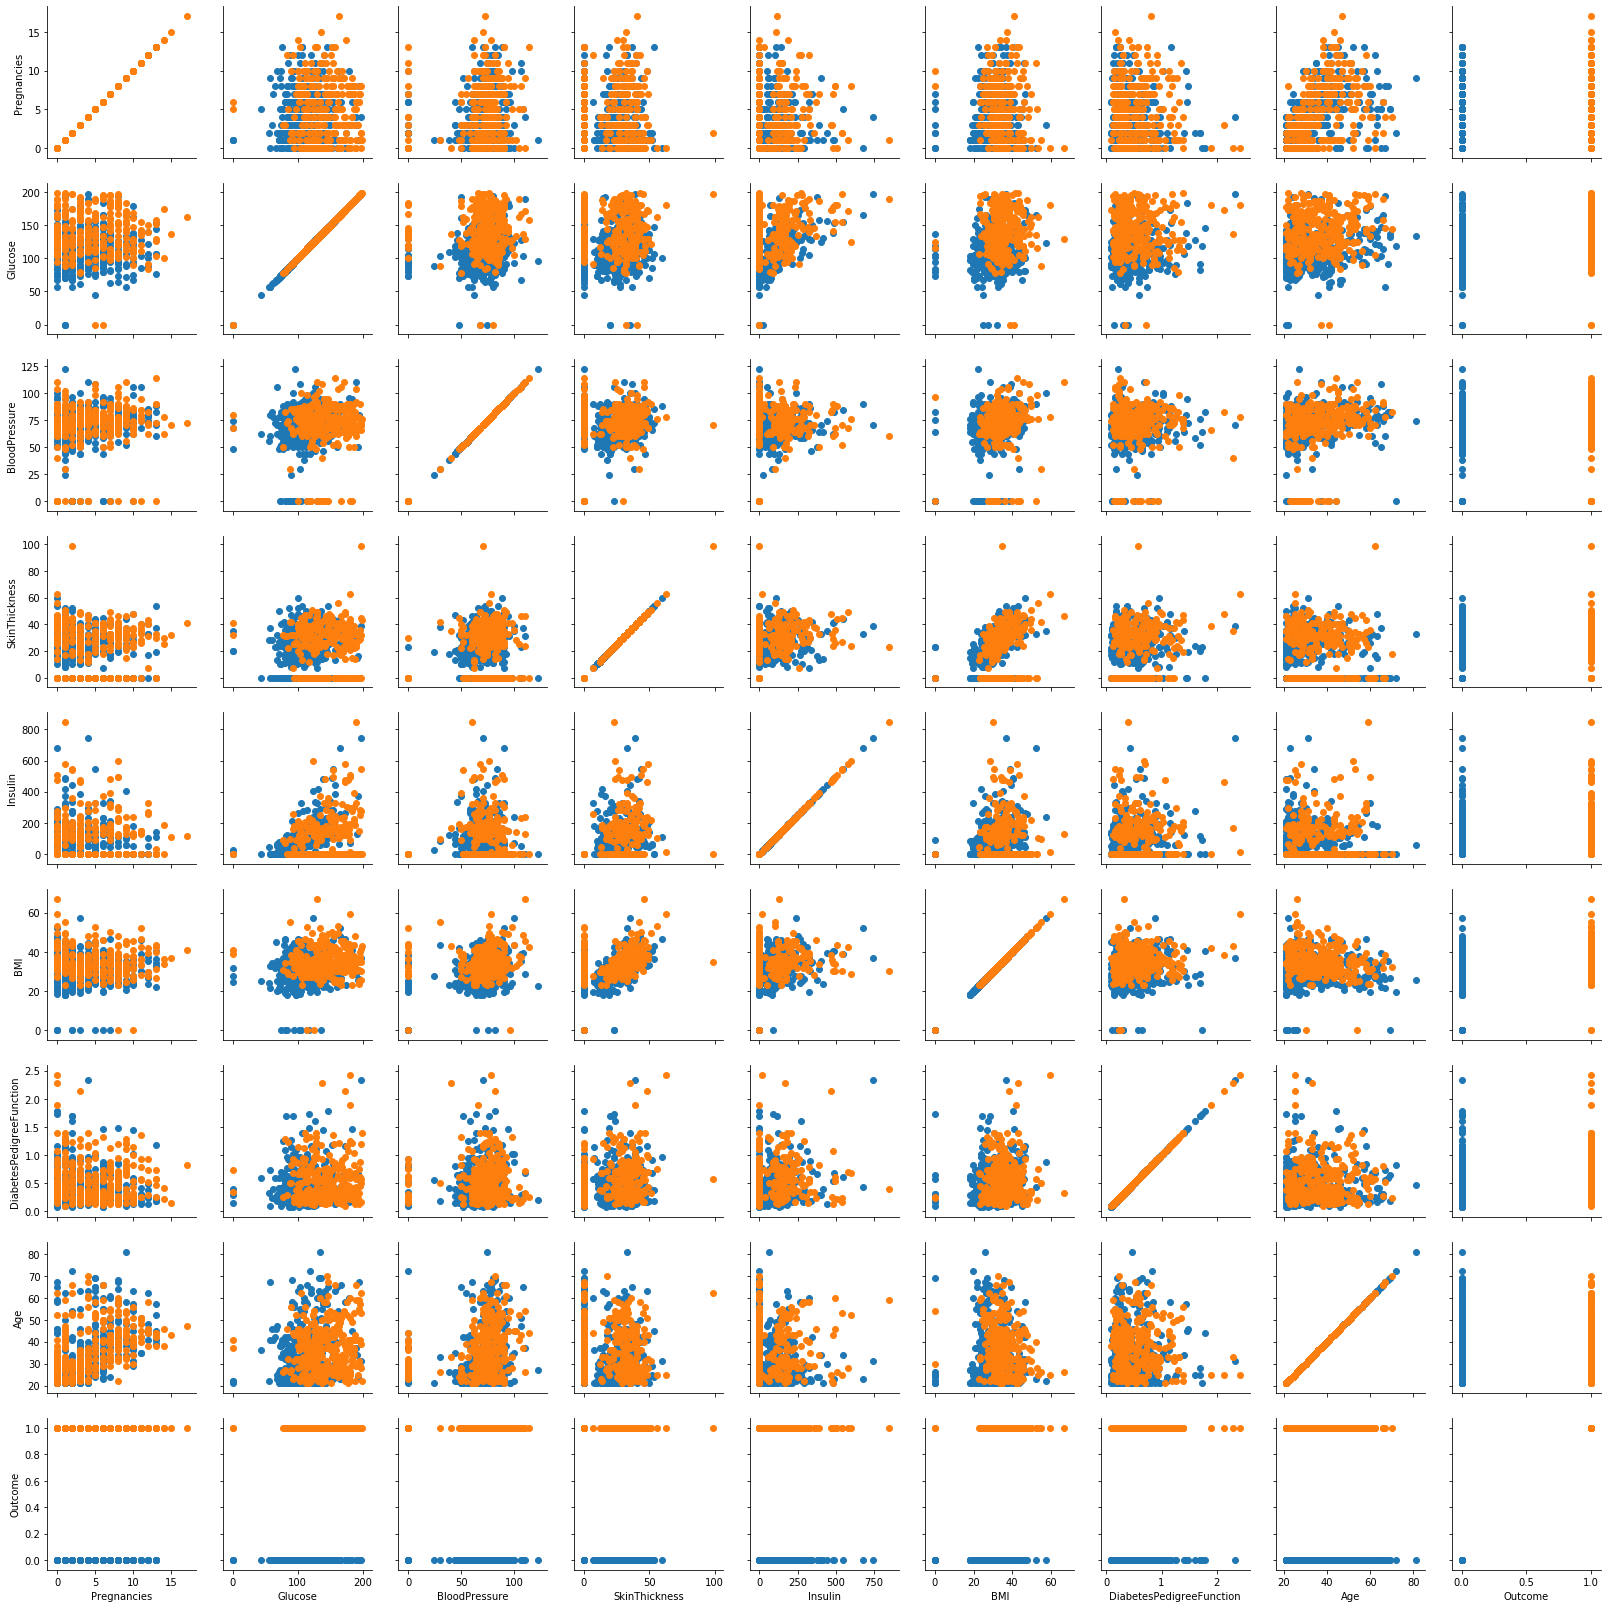

In [23]:
grid = sns.PairGrid(df, hue="Outcome")
grid.map(plt.scatter)